In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.maf.batches import ColMapDict

In [2]:
dbFile = 'pause_sim_v1.7_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [8]:
years=np.arange(13)
bundleList = []
colmap = ColMapDict('opsimV4')
for year in years[1:]:
    sqlconstraint = 'night > %i and night <= %i' % (365.25 * (year - 1), 365.25 * year)
    
    slicer = slicers.HourglassSlicer()
    metric = metrics.HourglassMetric(nightCol=colmap['night'], mjdCol=colmap['mjd'],
                                     metricName='Hourglass')
    bundle = metricBundles.MetricBundle(metric, slicer, constraint=sqlconstraint)
    bundleList.append(bundle)

Querying database SummaryAllProps with constraint night > 4017 and night <= 4383 for columns ['filter', 'night', 'observationStartMJD']


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:301: UserWarning: No data matching constraint night > 4017 and night <= 4383
  warnings.warn('No data matching constraint %s' % constraint)
/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:305: UserWarning:  This means skipping metrics ['Hourglass : night > 4017 and night < 4383 : HourglassSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)


Querying database SummaryAllProps with constraint night > 1461 and night <= 1826 for columns ['filter', 'night', 'observationStartMJD']
Found 209251 visits
Running:  ['opsim_Hourglass_night_gt_1461_and_night_lt_1826_HOUR']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night > 1826 and night <= 2191 for columns ['filter', 'night', 'observationStartMJD']
Found 178533 visits
Running:  ['opsim_Hourglass_night_gt_1826_and_night_lt_2191_HOUR']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night > 3652 and night <= 4017 for columns ['filter', 'night', 'observationStartMJD']
Found 123575 visits
Running:  ['opsim_Hourglass_night_gt_3652_and_night_lt_4017_HOUR']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night

/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:538: UserWarning: MetricBundle (opsim_Hourglass_night_gt_4017_and_night_lt_4383_HOUR) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "night > 1826 and night <= 2191" constraint now.
Plotting complete.
Plotting figures with "night > 3652 and night <= 4017" constraint now.
Plotting complete.
Plotting figures with "night > 2556 and night <= 2922" constraint now.
Plotting complete.
Plotting figures with "night > 365 and night <= 730" constraint now.
Plotting complete.
Plotting figures with "night > 730 and night <= 1095" constraint now.
Plotting complete.
Plotting figures with "night > 0 and night <= 365" constraint now.
Plotting complete.
Plotting figures with "night > 2922 and night <= 3287" constraint now.
Plotting complete.
Plotting figures with "night > 3287 and night <= 3652" constraint now.
Plotting complete.
Plotting figures with "night > 1095 and night <= 1461" constraint now.
Plotting complete.
Plotting figures with "night > 2191 and night <= 2556" constraint now.
Plotting complete.


<Figure size 432x288 with 0 Axes>

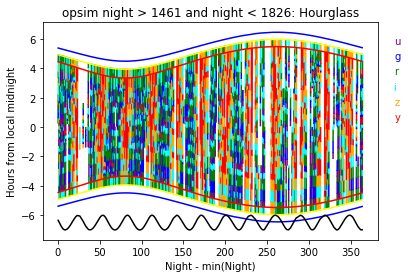

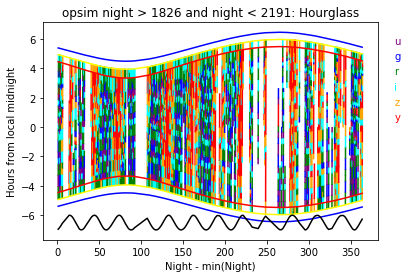

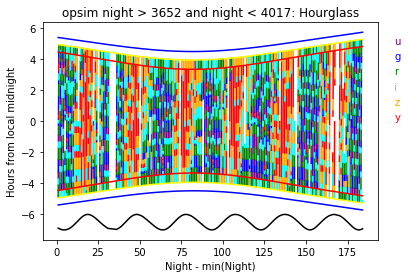

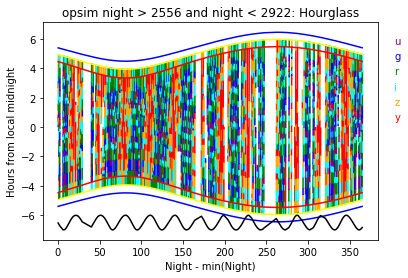

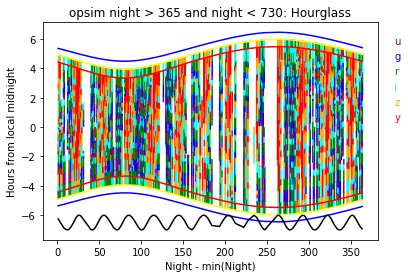

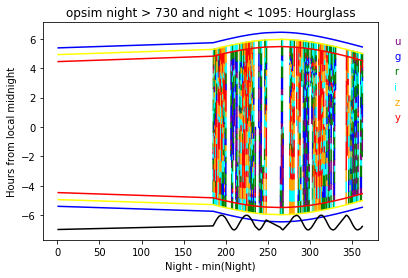

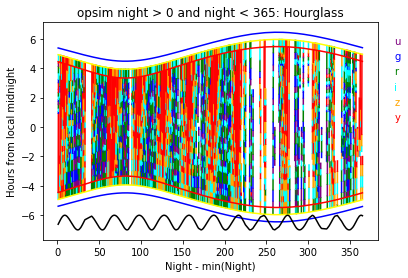

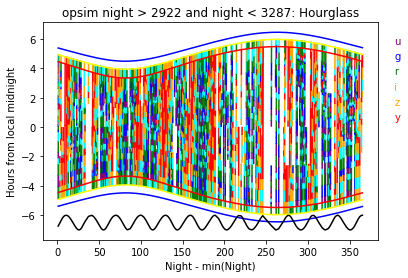

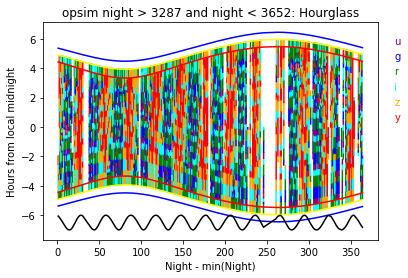

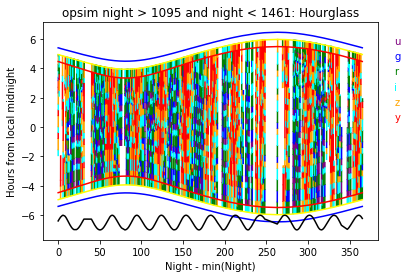

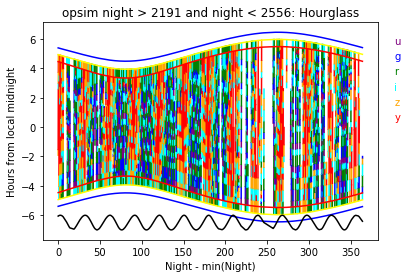

In [9]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)